# Matplotlib

This is the base plotting library in Python. Matplotlib is easy to get started with, and _heavily_ customizable. 

Producing a simple plot is just one line of code, but you can alter nearly every aspect of a plot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt # the standard import for matplotlib

##### Our first example

In [3]:
x = np.linspace(0, 4*np.pi, 100)
sin_x = np.sin(x)
cos_x = np.cos(x)

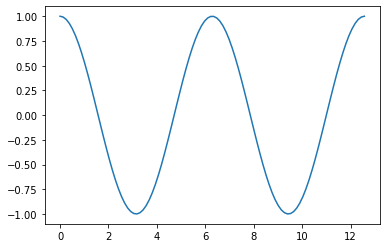

In [4]:
plt.plot(x, cos_x) # it's really that easy

Let's make this a bit prettier

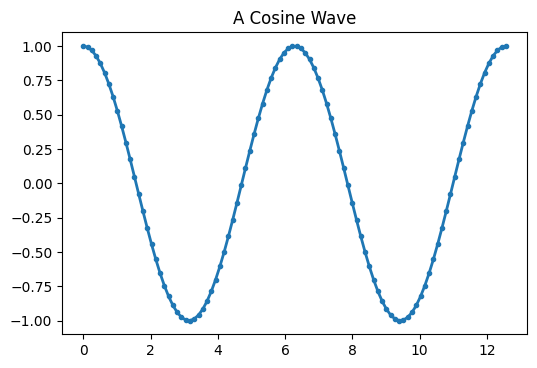

In [5]:
plt.figure(dpi=100) # this says "call a new figure and use this resolution"
plt.plot(x, cos_x,
         linewidth=2., # make the line wider
         marker='.') # use a marker at the data points

plt.title("A Cosine Wave")
plt.show()

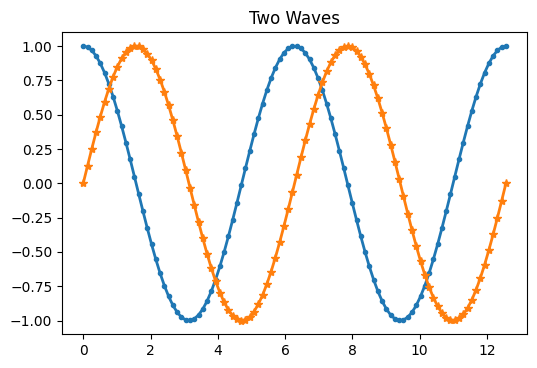

In [6]:
plt.figure(dpi=100) # this says "call a new figure and use this resolution"
plt.plot(x, cos_x,
         linewidth=2., # make the line wider
         marker='.') # use a marker at the data points

plt.plot(x, sin_x,
         linewidth=2., # make the line wider
         marker='*') # use a marker at the data points

plt.title("Two Waves")
plt.show()

A simple legend and color options

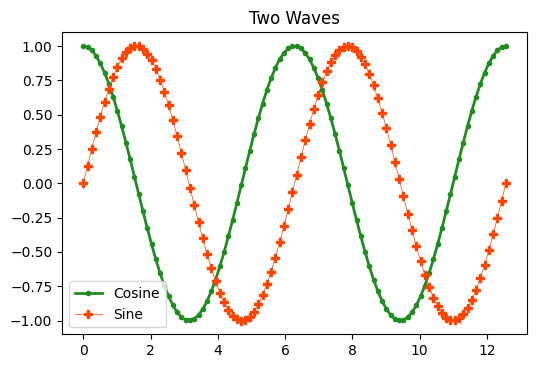

In [7]:
plt.figure(dpi=100) # this says "call a new figure and use this resolution"
plt.plot(x, cos_x,
         linewidth=2.,
         marker='.',
         color='forestgreen',
         label='Cosine') 

plt.plot(x, sin_x,
         linewidth=0.5,
         marker='P',
         color='orangered',
         label="Sine")

plt.title("Two Waves")
plt.legend()
plt.show()

## **Question**
How would you make plot `x^2` in blue and `x^3` in red on the same plot between `x=-3` and `x=3`
with appropriate legend entries? (bonus points for good titles)

_hint: `np.power()` or `x**2`_

### The `ax` class

The `ax` class is the basic matplotlib `axes` class that lets you further modify the plotting parameters

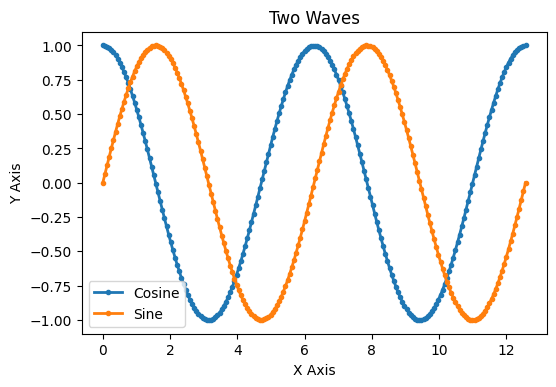

In [136]:
fig, ax = plt.subplots(dpi=100)
ax.plot(x, cos_x,
         linewidth=2.,
         marker='.',
         label='Cosine')

ax.plot(x, sin_x,
        linewidth=2.,
        marker='.',
        label='Sine')

ax.set_title("Two Waves")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.legend()
plt.show()

**A simple use case for the `ax` class: `ax.twinx()`**

Suppose we have two datasets on totally different scales

In [21]:
sin_x = 100 * np.sin(x)

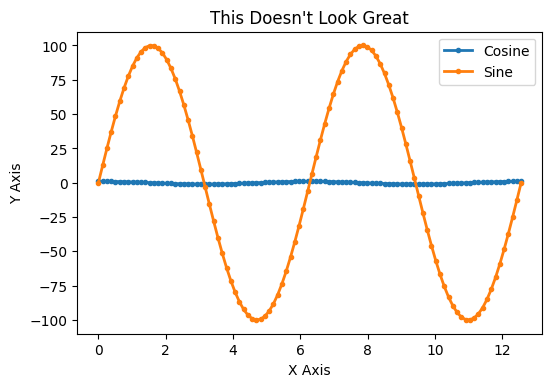

In [22]:
fig, ax = plt.subplots(dpi=100)
ax.plot(x, cos_x,
         linewidth=2.,
         marker='.',
         label='Cosine')

ax.plot(x, sin_x,
        linewidth=2.,
        marker='.',
        label='Sine')

ax.set_title("This Doesn't Look Great")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.legend()
plt.show()

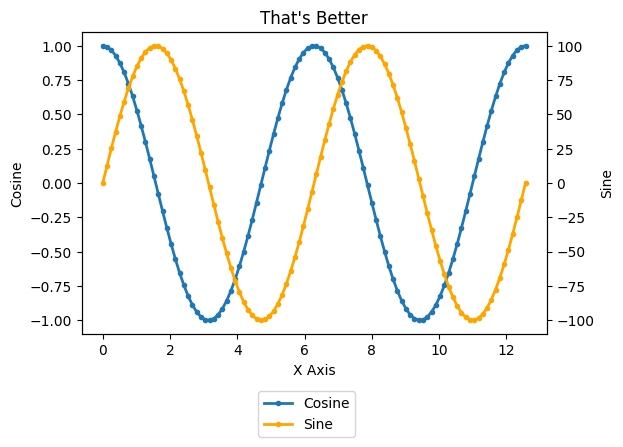

In [23]:
fig, ax = plt.subplots(dpi=100)
ax.plot(x, cos_x,
         linewidth=2.,
         marker='.',
         label='Cosine')

ax2 = ax.twinx()

ax2.plot(x, sin_x,
        linewidth=2.,
        marker='.',
        color = 'orange',
        label='Sine')

ax.set_title("That's Better")
ax.set_xlabel("X Axis")
ax.set_ylabel("Cosine")
ax2.set_ylabel("Sine")
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15))
plt.show()

## Subplots

Text(0.5, 0.98, 'Subplots')

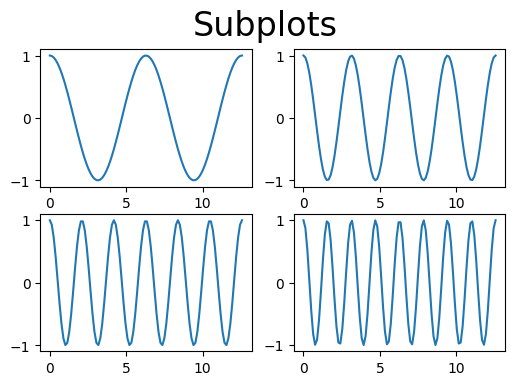

In [24]:
fig, axes = plt.subplots(2, 2, dpi=100)
axes[0, 0].plot(x, np.cos(x))
axes[0, 1].plot(x, np.cos(2*x))
axes[1, 0].plot(x, np.cos(3*x))
axes[1, 1].plot(x, np.cos(4*x))
fig.suptitle("Subplots", fontsize=24)

## Filling and Shading

In [90]:
upper = cos_x + 0.2
lower = cos_x - 0.2

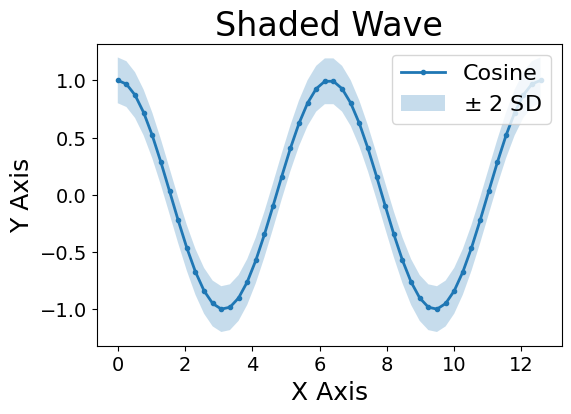

In [91]:
fig, ax = plt.subplots(dpi=100)
ax.plot(x, cos_x,
         linewidth=2.,
         marker='.',
         label='Cosine')

ax.fill_between(x, # where on x axis
                lower, # lower bound
                upper, # upper bound
                label=r"$\pm$ 2 SD",
                alpha=0.25) # a transparancy parameter

ax.set_title("Shaded Wave", fontsize=24)
ax.set_xlabel("X Axis", fontsize=18)
ax.set_ylabel("Y Axis", fontsize=18)
ax.legend(loc='upper right', fontsize=16)
ax.tick_params('both', labelsize=14)
plt.show()

## Imshow and Colormaps

In [143]:
from scipy.spatial import distance_matrix

In [247]:
nx = 400
ax_nx = 20
mean = np.zeros(nx)

## make a grid of points
pts = np.expand_dims(np.linspace(0, 5, ax_nx), 0)
xs = np.expand_dims(np.repeat(pts, ax_nx, axis=0).flatten(), -1)
ys = np.expand_dims(np.repeat(pts, ax_nx, axis=0).T.flatten(), -1)

## make a covariance matrix
cov = distance_matrix(np.concatenate((xs, ys), -1), np.concatenate((xs, ys), -1))
cov = np.exp(-np.power(cov, 2)/2.)

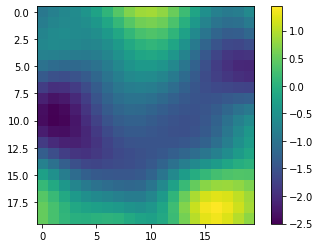

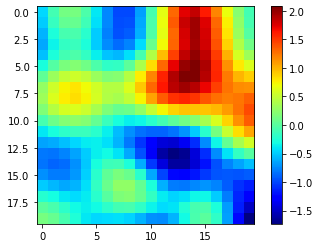

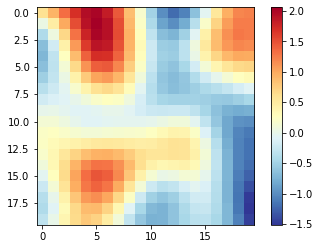

In [248]:
sample = np.random.multivariate_normal(mean, cov).reshape(ax_nx, -1)
plt.imshow(sample)
plt.colorbar()
plt.show()

sample = np.random.multivariate_normal(mean, cov).reshape(ax_nx, -1)
plt.imshow(sample, cmap='jet')
plt.colorbar()
plt.show()

sample = np.random.multivariate_normal(mean, cov).reshape(ax_nx, -1)
plt.imshow(sample, cmap='RdYlBu_r')
plt.colorbar()
plt.show()

# Seaborn: Making Things Pretty

In [249]:
import seaborn as sns

In [281]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.cos(x)
y2 = np.cos(x + 0.25)
y3 = np.cos(x + 0.5)
y4 = np.cos(x + 0.75)

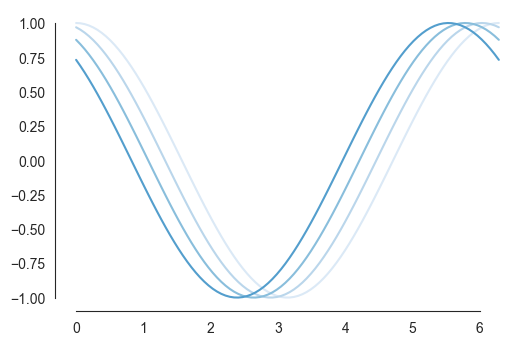

In [292]:
plt.figure(dpi=100)
sns.set_style("white")
sns.set_palette("Blues")
sns.lineplot(x=x, y=y1)
sns.lineplot(x=x, y=y2)
sns.lineplot(x=x, y=y3)
sns.lineplot(x=x, y=y4)
sns.despine(trim=True)
plt.show()

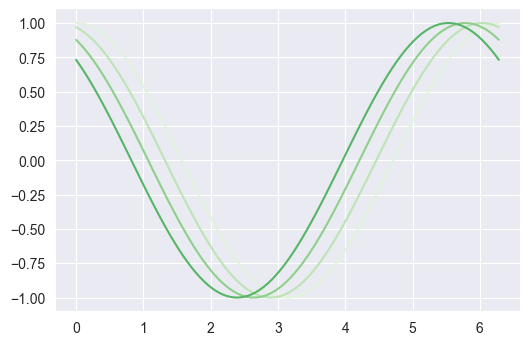

In [293]:
plt.figure(dpi=100)
sns.set_style("darkgrid")
sns.set_palette("Greens")
sns.lineplot(x=x, y=y1)
sns.lineplot(x=x, y=y2)
sns.lineplot(x=x, y=y3)
sns.lineplot(x=x, y=y4)
sns.despine()
plt.show()

# Seaborn has much more! Stay Tuned